In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/final project')

Mounted at /content/gdrive


In [ ]:
!pip install -q keras

In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sn

# 2. Hateful Memes

## 2.1. Data preprocessing



In [ ]:
import os
import h5py
import matplotlib.pyplot as plt
import pandas as pd 
import time, pickle, pandas
import numpy as np
import random
import copy
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
data_dir = 'hateful_meme/data/'
img_dir = data_dir + '/img/'
train_path = data_dir + "train.jsonl"
test_path = data_dir + "test.jsonl"
dev_path = data_dir + "dev.jsonl"

In [ ]:
train_data = pd.read_json(train_path, lines=True)
test_data = pd.read_json(test_path, lines=True)
dev_data = pd.read_json(dev_path, lines=True)
train_data_0 = train_data.loc[train_data['label'] == 0]


In [ ]:
train_data.head(10)

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
5,16952,img/16952.png,0,go sports! do the thing! win the points!
6,76932,img/76932.png,0,fine you're right. now can we fucking drop it?
7,70914,img/70914.png,0,tattoos are bad for your health i know 5 milli...
8,2973,img/02973.png,0,how long can i run? till the chain tightens
9,58306,img/58306.png,0,what is he hiding? we need to see his tax retu...


In [ ]:
dev_data.head(10)

,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime
5,5279,img/05279.png,1,"knowing white people , that's probably the bab..."
6,1796,img/01796.png,1,life hack #23 how to get stoned with no weed
7,53046,img/53046.png,1,"you've heard of elf on a shelf, now get ready for"
8,82301,img/82301.png,1,cooooooooooooon!!!!
9,31752,img/31752.png,1,when you get to choose your own mental illness


### a. Data class

In [ ]:
import json
class HatefulMemes(keras.utils.Sequence):
    
    def __init__(self, data_dir):
        super().__init__()
        self.data = [json.loads(l) for l in open(data_dir)]
        self.data_path = os.path.dirname(data_dir)
        
    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.data_path, self.data[idx]["img"])).convert("RGB")
        text = self.data[idx]["text"]
        label = self.data[idx]["label"]
        image = np.asarray(image.resize((299,299)))
        return image, text, label
            
    def load_img(self, idx):
        image = Image.open(os.path.join(self.data_path, self.data[idx]["img"])).convert("RGB")
        image = np.asarray(image.resize((299,299)))
        return image
    
    def get_label(self, index: int):
        label = self.data[index]["label"]
        return label
    
    def get_text(self, index: int):
        text = self.data[index]["text"]
        return text
    
    def __len__(self):
        return len(self.data)
    
    #add
    def get_imgname(self, index: int):
        imgname = self.data[index]["img"]
        return imgname[4:]

In [ ]:
train_dataset = HatefulMemes(train_path)
val_dataset = HatefulMemes(dev_path)
test_dataset = HatefulMemes(test_path)


In [ ]:
train_dataset.get_imgname(0)

'42953.png'

In [ ]:
text = train_dataset.get_text(1)
print(text)

don't be afraid to love again everyone is not like your ex


In [ ]:
from random import sample

In [ ]:
train_ids = [id for id in range(0, len(train_dataset))]
# train_sample = sample(train_ids, 1000)
# imgs = [train_dataset.load_img(id) for id in train_ids]

## UNCOMMENT IF NEED TO RELOAD
# train_img_list = []
# for id in train_ids:
#   # print(id)
#   img = train_dataset.load_img(id)
#   train_img_list.append(img)
# print(train_img_list[:5])

# train_ids = train_data["id"].tolist()
# imgs = []
# train_names = train_data["img"].tolist()
# for name in train_names:
#   img = get_image(data_dir, name)
# print(train_ids)

### b. save training imgs 

In [ ]:
#output_path = "/content/drive/MyDrive/hateful_meme/data/train_img_sample/"
#if not os.path.exists(output_path):
  #os.mkdir(output_path) 
#np.save(os.path.join(output_path,"train_images_sample.npy"), train_img_list)

In [ ]:
train_sample = np.load("hateful_meme/data/train_img_sample/train_images_sample.npy", allow_pickle=True)
# print(enc_train)
dev_sample = np.load("hateful_meme/data/dev_img_sample/dev_images_sample.npy", allow_pickle=True)

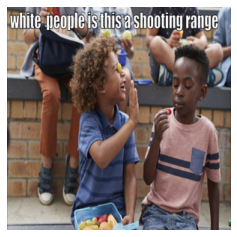

In [ ]:
plt.figure(figsize=(4,5));plt.imshow(dev_sample[0]); plt.axis(False);plt.show()

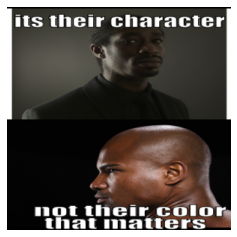

In [ ]:
plt.figure(figsize=(4,5));plt.imshow(train_sample[0]); plt.axis(False);plt.show()

In [ ]:
print(len(train_sample))
print(len(dev_sample))

8500
500


In [ ]:
print('Data size of training data: %d samples' % len(train_dataset))
print('Data size of validation data: %d samples' % len(val_dataset))
print('Data size of test data: %d samples' % len(test_dataset))

print('Data size of training data 0: %d samples' % len(train_data_0))


Data size of training data: 8500 samples
Data size of validation data: 500 samples
Data size of test data: 1000 samples
Data size of training data 0: 5450 samples


In [ ]:
sample_memeID = 1
img, text, label = train_dataset[sample_memeID]

# Show input image.
plt.figure(figsize=(4,5));plt.imshow(img); plt.axis(False);plt.show()

# Show input plot (untokenized).
print(text)
print(label)
print(img.shape)

## 2.4 Approach 2: Hateful Memes Classification using memes

In this section, we apply transfer learning on pre-trained model to classify hateful memes.

In [ ]:
import os
import h5py

import matplotlib.pyplot as plt
import time, pickle, pandas

import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D, ZeroPadding2D, Conv2D, AveragePooling2D
from keras.layers import Input, Add, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras import backend
from keras import optimizers

%matplotlib inline

In [ ]:
img_width, img_height = 299, 299
batch_size = 32

In [ ]:
# split dataset into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(train_sample, train_data.label, test_size=0.2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, test_size=0.5, shuffle=True)

### 2.4.1 VGG16

In [ ]:
# define vgg16 network
def build_vgg16(framework='tf'):

    if framework == 'th':
        # build the VGG16 network in Theano weight ordering mode
        backend.set_image_data_format('channels_first')
    else:
        # build the VGG16 network in Tensorflow weight ordering mode
        backend.set_image_data_format('channels_last')
        
    model = Sequential()
    if framework == 'th':
        model.add(ZeroPadding2D((1, 1), input_shape=(3, img_width, img_height)))
    else:
        model.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height, 3)))
        
    model.add(Conv2D(64, (3, 3), activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    return model

In [ ]:
# load model trained on imagenet
weights_path = './vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg_model = build_vgg16('tf')
vgg_model.load_weights(weights_path)

In [ ]:
# add a model on the top
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.5))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(BatchNormalization())
top_model.add(Dense(1, activation='sigmoid'))

print(top_model.summary())
vgg_model.add(top_model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 41472)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               10617088  
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
# set the first 25 layers to non-trainable
for layer in vgg_model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer and 1e-4 learning rate.
vgg_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
save_path="./vgg16/best_model.h5"
checkpoint = ModelCheckpoint(save_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

hist = vgg_model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_valid, y_valid), callbacks=callbacks_list)

Epoch 1/10
213/213 [==============================] - ETA: 0s - loss: 0.8579 - accuracy: 0.5062
Epoch 1: val_accuracy improved from -inf to 0.54941, saving model to ./vgg16/best_model.h5
213/213 [==============================] - 88s 409ms/step - loss: 0.8579 - accuracy: 0.5062 - val_loss: 0.7123 - val_accuracy: 0.5494
Epoch 2/10
213/213 [==============================] - ETA: 0s - loss: 0.7500 - accuracy: 0.5838
Epoch 2: val_accuracy improved from 0.54941 to 0.59059, saving model to ./vgg16/best_model.h5
213/213 [==============================] - 87s 409ms/step - loss: 0.7500 - accuracy: 0.5838 - val_loss: 0.6937 - val_accuracy: 0.5906
Epoch 3/10
213/213 [==============================] - ETA: 0s - loss: 0.7137 - accuracy: 0.6004
Epoch 3: val_accuracy improved from 0.59059 to 0.60000, saving model to ./vgg16/best_model.h5
213/213 [==============================] - 90s 424ms/step - loss: 0.7137 - accuracy: 0.6004 - val_loss: 0.6994 - val_accuracy: 0.6000
Epoch 4/10
213/213 [===========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


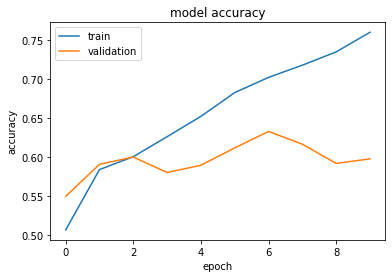

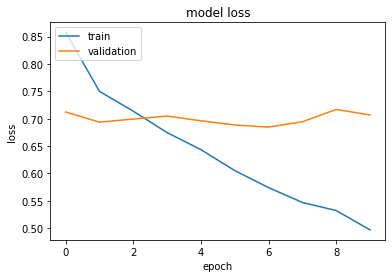

In [ ]:
print(hist.history.keys())
# plot accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# plot loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# load the best model
vgg_model.load_weights("./vgg16/best_model.h5")

In [ ]:
print("Evaluate on test data")
results = vgg_model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
27/27 [==============================] - 9s 332ms/step - loss: 0.6595 - accuracy: 0.6506
test loss, test acc: [0.6595481038093567, 0.6505882143974304]


In [ ]:
# unfreeze layers
for layer in vgg_model.layers[:25]:
    layer.trainable = True

# compile the model with a SGD/momentum optimizer and 1e-4 learning rate.
vgg_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
save_path="./vgg16/best_model2.h5"
checkpoint = ModelCheckpoint(save_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

hist = vgg_model.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_valid, y_valid), callbacks=callbacks_list)

Epoch 1/5
213/213 [==============================] - ETA: 0s - loss: 0.6201 - accuracy: 0.6734
Epoch 1: val_accuracy improved from -inf to 0.73059, saving model to ./vgg16/best_model2.h5
213/213 [==============================] - 204s 953ms/step - loss: 0.6201 - accuracy: 0.6734 - val_loss: 0.5431 - val_accuracy: 0.7306
Epoch 2/5
213/213 [==============================] - ETA: 0s - loss: 0.6182 - accuracy: 0.6682
Epoch 2: val_accuracy did not improve from 0.73059
213/213 [==============================] - 196s 918ms/step - loss: 0.6182 - accuracy: 0.6682 - val_loss: 0.6026 - val_accuracy: 0.6694
Epoch 3/5
213/213 [==============================] - ETA: 0s - loss: 0.6082 - accuracy: 0.6779
Epoch 3: val_accuracy did not improve from 0.73059
213/213 [==============================] - 195s 916ms/step - loss: 0.6082 - accuracy: 0.6779 - val_loss: 0.6056 - val_accuracy: 0.6800
Epoch 4/5
213/213 [==============================] - ETA: 0s - loss: 0.5988 - accuracy: 0.6860
Epoch 4: val_accuracy

In [ ]:
# load the best model
vgg_model.load_weights("./vgg16/best_model2.h5")

In [ ]:
print("Evaluate on test data")
results = vgg_model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
27/27 [==============================] - 9s 314ms/step - loss: 0.5575 - accuracy: 0.7188
test loss, test acc: [0.5574550032615662, 0.7188235521316528]


### 2.4.2 ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(299, 299, 3)))

In [ ]:
# add a model on the top
headModel = baseModel.output
headModel = Flatten()(headModel)
headModel = Dense(256, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = BatchNormalization()(headModel)
headModel = Dense(128, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = BatchNormalization()(headModel)
headModel = Dense(1, activation='sigmoid')(headModel)

In [ ]:
resnet_model = Model(inputs=baseModel.input, outputs=headModel)
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 305, 305, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
for layer in resnet_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f85e2892250> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f867a834bb0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f867a8c2c10> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f89903a44f0> False
<keras.layers.core.activation.Activation object at 0x7f867a8e3280> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f85e18082b0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8990374fa0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f899cf39a90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f85e28b2c10> False
<keras.layers.core.activation.Activation object at 0x7f85e28b2a30> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f899038e730> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f89903a15b0> False
<keras.layers.c

In [ ]:
# compile the model with a SGD/momentum optimizer and 1e-4 learning rate.
resnet_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
resnet_save_path="./resnet/best_model.h5"
checkpoint = ModelCheckpoint(resnet_save_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

resnet_hist = resnet_model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_valid, y_valid), callbacks=callbacks_list)

Epoch 1/10
213/213 [==============================] - ETA: 0s - loss: 0.8583 - accuracy: 0.5190
Epoch 1: val_accuracy improved from -inf to 0.53765, saving model to ./resnet50/best_model.h5
213/213 [==============================] - 58s 246ms/step - loss: 0.8583 - accuracy: 0.5190 - val_loss: 0.7226 - val_accuracy: 0.5376
Epoch 2/10
213/213 [==============================] - ETA: 0s - loss: 0.7912 - accuracy: 0.5579
Epoch 2: val_accuracy improved from 0.53765 to 0.57294, saving model to ./resnet50/best_model.h5
213/213 [==============================] - 51s 241ms/step - loss: 0.7912 - accuracy: 0.5579 - val_loss: 0.6872 - val_accuracy: 0.5729
Epoch 3/10
213/213 [==============================] - ETA: 0s - loss: 0.7356 - accuracy: 0.5894
Epoch 3: val_accuracy improved from 0.57294 to 0.62588, saving model to ./resnet50/best_model.h5
213/213 [==============================] - 50s 236ms/step - loss: 0.7356 - accuracy: 0.5894 - val_loss: 0.6653 - val_accuracy: 0.6259
Epoch 4/10
213/213 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


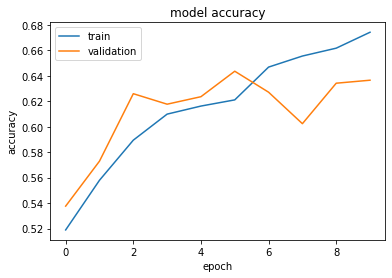

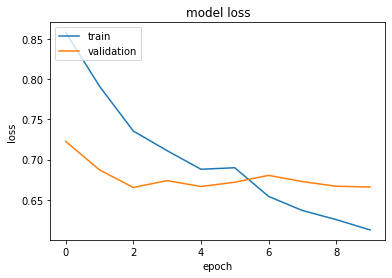

In [ ]:
print(resnet_hist.history.keys())
# plot accuracy
plt.plot(resnet_hist.history['accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# plot loss
plt.plot(resnet_hist.history['loss'])
plt.plot(resnet_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# load the best model
resnet_model.load_weights("./resnet/best_model.h5")

In [ ]:
print("Evaluate on test data")
results = resnet_model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
27/27 [==============================] - 5s 186ms/step - loss: 0.6472 - accuracy: 0.6412
test loss, test acc: [0.647171139717102, 0.6411764621734619]


In [ ]:
# unfreeze layers
for layer in baseModel.layers:
    layer.trainable = True

resnet_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
resnet_save_path="./resnet/best_model2.h5"
checkpoint = ModelCheckpoint(resnet_save_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

resnet_hist = resnet_model.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_valid, y_valid), callbacks=callbacks_list)

Epoch 1/5
213/213 [==============================] - ETA: 0s - loss: 0.7347 - accuracy: 0.5849
Epoch 1: val_accuracy improved from -inf to 0.67176, saving model to ./resnet/best_model2.h5
213/213 [==============================] - 154s 678ms/step - loss: 0.7347 - accuracy: 0.5849 - val_loss: 0.6063 - val_accuracy: 0.6718
Epoch 2/5
213/213 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.6122
Epoch 2: val_accuracy did not improve from 0.67176
213/213 [==============================] - 137s 642ms/step - loss: 0.6869 - accuracy: 0.6122 - val_loss: 0.6175 - val_accuracy: 0.6541
Epoch 3/5
213/213 [==============================] - ETA: 0s - loss: 0.6544 - accuracy: 0.6401
Epoch 3: val_accuracy did not improve from 0.67176
213/213 [==============================] - 137s 644ms/step - loss: 0.6544 - accuracy: 0.6401 - val_loss: 0.6267 - val_accuracy: 0.6482
Epoch 4/5
213/213 [==============================] - ETA: 0s - loss: 0.6159 - accuracy: 0.6724
Epoch 4: val_accurac

In [ ]:
# load the best model
resnet_model.load_weights("./resnet/best_model2.h5")

In [ ]:
print("Evaluate on test data")
results = resnet_model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
27/27 [==============================] - 5s 186ms/step - loss: 0.6073 - accuracy: 0.6729
test loss, test acc: [0.6073316335678101, 0.6729411482810974]


### 2.4.3 ResNet101

In [ ]:
from tensorflow.keras.applications import ResNet101

baseModel = ResNet101(weights="imagenet", include_top=False, input_tensor=Input(shape=(299, 299, 3)))

171446536/171446536 [==============================] - 6s 0us/step


In [ ]:
# add a model on the top
headModel = baseModel.output
headModel = Flatten()(headModel)
headModel = Dense(256, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = BatchNormalization()(headModel)
headModel = Dense(128, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = BatchNormalization()(headModel)
headModel = Dense(1, activation='sigmoid')(headModel)

In [ ]:
resnet101_model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
# compile the model with a SGD/momentum optimizer and 1e-4 learning rate.
resnet101_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
resnet101_save_path="./resnet/best_101_model.h5"
checkpoint = ModelCheckpoint(resnet101_save_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

resnet101_hist = resnet101_model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_valid, y_valid), callbacks=callbacks_list)

Epoch 1/10
213/213 [==============================] - ETA: 0s - loss: 0.8631 - accuracy: 0.5184
Epoch 1: val_accuracy improved from -inf to 0.61647, saving model to ./resnet/best_101_model.h5
213/213 [==============================] - 86s 377ms/step - loss: 0.8631 - accuracy: 0.5184 - val_loss: 0.6535 - val_accuracy: 0.6165
Epoch 2/10
213/213 [==============================] - ETA: 0s - loss: 0.7789 - accuracy: 0.5749
Epoch 2: val_accuracy did not improve from 0.61647
213/213 [==============================] - 76s 356ms/step - loss: 0.7789 - accuracy: 0.5749 - val_loss: 0.6704 - val_accuracy: 0.6094
Epoch 3/10
213/213 [==============================] - ETA: 0s - loss: 0.7453 - accuracy: 0.5869
Epoch 3: val_accuracy did not improve from 0.61647
213/213 [==============================] - 75s 354ms/step - loss: 0.7453 - accuracy: 0.5869 - val_loss: 0.6812 - val_accuracy: 0.5788
Epoch 4/10
213/213 [==============================] - ETA: 0s - loss: 0.7032 - accuracy: 0.6196
Epoch 4: val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


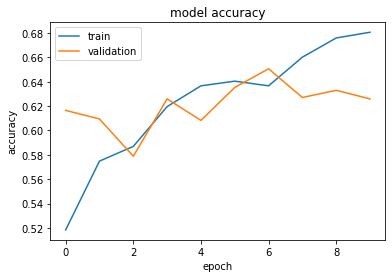

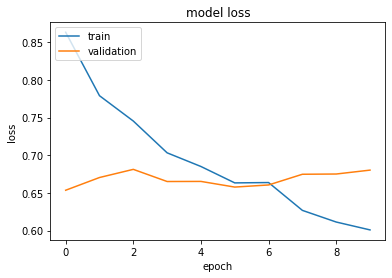

In [ ]:
print(resnet101_hist.history.keys())
# plot accuracy
plt.plot(resnet101_hist.history['accuracy'])
plt.plot(resnet101_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# plot loss
plt.plot(resnet101_hist.history['loss'])
plt.plot(resnet101_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# load the best model
resnet101_model.load_weights("./resnet/best_101_model.h5")

In [ ]:
print("Evaluate on test data")
results = resnet101_model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
27/27 [==============================] - 8s 310ms/step - loss: 0.6579 - accuracy: 0.6482
test loss, test acc: [0.6579310297966003, 0.6482353210449219]


In [ ]:
# unfreeze the layers
for layer in baseModel.layers:
    layer.trainable = True

# compile the model with a SGD/momentum optimizer and 1e-4 learning rate.
resnet101_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
resnet101_save_path="./resnet/best_101_model2.h5"
checkpoint = ModelCheckpoint(resnet101_save_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

resnet101_hist = resnet101_model.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_valid, y_valid), callbacks=callbacks_list)

Epoch 1/5
213/213 [==============================] - ETA: 0s - loss: 0.7156 - accuracy: 0.6010
Epoch 1: val_accuracy improved from -inf to 0.66000, saving model to ./resnet/best_101_model2.h5
213/213 [==============================] - 256s 1s/step - loss: 0.7156 - accuracy: 0.6010 - val_loss: 0.6101 - val_accuracy: 0.6600
Epoch 2/5
213/213 [==============================] - ETA: 0s - loss: 0.6820 - accuracy: 0.6234
Epoch 2: val_accuracy did not improve from 0.66000
213/213 [==============================] - 212s 997ms/step - loss: 0.6820 - accuracy: 0.6234 - val_loss: 0.6408 - val_accuracy: 0.6259
Epoch 3/5
213/213 [==============================] - ETA: 0s - loss: 0.6490 - accuracy: 0.6474
Epoch 3: val_accuracy did not improve from 0.66000
213/213 [==============================] - 212s 998ms/step - loss: 0.6490 - accuracy: 0.6474 - val_loss: 0.6376 - val_accuracy: 0.6412
Epoch 4/5
213/213 [==============================] - ETA: 0s - loss: 0.6179 - accuracy: 0.6725
Epoch 4: val_accura

In [ ]:
# load the best model
resnet101_model.load_weights("./resnet/best_101_model2.h5")

In [ ]:
print("Evaluate on test data")
results = resnet101_model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
27/27 [==============================] - 7s 272ms/step - loss: 0.5910 - accuracy: 0.6753
test loss, test acc: [0.5909594297409058, 0.6752941012382507]


### 2.4.4 DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121

baseModel = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(299, 299, 3)))

In [ ]:
# add a model on the top
headModel = baseModel.output
headModel = Flatten()(headModel)
headModel = Dense(256, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = BatchNormalization()(headModel)
headModel = Dense(128, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = BatchNormalization()(headModel)
headModel = Dense(1, activation='sigmoid')(headModel)

In [ ]:
densenet_model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
# compile the model with a SGD/momentum optimizer and 1e-3 learning rate.
densenet_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-3, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
densenet_save_path="./densenet/best_model0.h5"
checkpoint = ModelCheckpoint(densenet_save_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

densenet_hist = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_valid, y_valid), callbacks=callbacks_list)

Epoch 1/10
213/213 [==============================] - ETA: 0s - loss: 0.8030 - accuracy: 0.5379
Epoch 1: val_accuracy improved from -inf to 0.61882, saving model to ./densenet/best_model0.h5
213/213 [==============================] - 48s 194ms/step - loss: 0.8030 - accuracy: 0.5379 - val_loss: 0.6591 - val_accuracy: 0.6188
Epoch 2/10
213/213 [==============================] - ETA: 0s - loss: 0.7032 - accuracy: 0.5956
Epoch 2: val_accuracy improved from 0.61882 to 0.62000, saving model to ./densenet/best_model0.h5
213/213 [==============================] - 41s 192ms/step - loss: 0.7032 - accuracy: 0.5956 - val_loss: 0.6531 - val_accuracy: 0.6200
Epoch 3/10
213/213 [==============================] - ETA: 0s - loss: 0.6722 - accuracy: 0.6147
Epoch 3: val_accuracy improved from 0.62000 to 0.63176, saving model to ./densenet/best_model0.h5
213/213 [==============================] - 40s 189ms/step - loss: 0.6722 - accuracy: 0.6147 - val_loss: 0.6600 - val_accuracy: 0.6318
Epoch 4/10
213/213 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


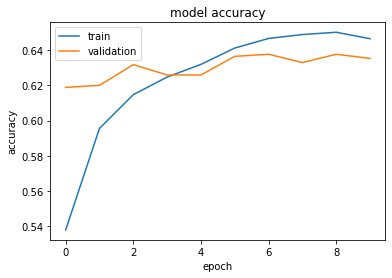

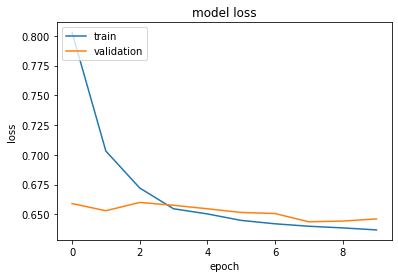

In [ ]:
print(densenet_hist.history.keys())
# plot accuracy
plt.plot(densenet_hist.history['accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# plot loss
plt.plot(densenet_hist.history['loss'])
plt.plot(densenet_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# load the best model
densenet_model.load_weights("./densenet/best_model0.h5")

In [ ]:
print("Evaluate on test data")
results = densenet_model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
27/27 [==============================] - 4s 152ms/step - loss: 0.6250 - accuracy: 0.6553
test loss, test acc: [0.6250054836273193, 0.6552941203117371]


In [ ]:
# unfreeze the layers
for layer in baseModel.layers:
    layer.trainable = True

# compile the model with a SGD/momentum optimizer and 1e-4 learning rate.
densenet_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
densenet_save_path="./densenet/best_model2.h5"
checkpoint = ModelCheckpoint(densenet_save_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

densenet_hist = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_valid, y_valid), callbacks=callbacks_list)

Epoch 1/5
213/213 [==============================] - ETA: 0s - loss: 0.6595 - accuracy: 0.6329
Epoch 1: val_accuracy improved from -inf to 0.62000, saving model to ./densenet/best_model2.h5
213/213 [==============================] - 159s 675ms/step - loss: 0.6595 - accuracy: 0.6329 - val_loss: 0.6702 - val_accuracy: 0.6200
Epoch 2/5
213/213 [==============================] - ETA: 0s - loss: 0.6568 - accuracy: 0.6356
Epoch 2: val_accuracy improved from 0.62000 to 0.62235, saving model to ./densenet/best_model2.h5
213/213 [==============================] - 139s 653ms/step - loss: 0.6568 - accuracy: 0.6356 - val_loss: 0.6679 - val_accuracy: 0.6224
Epoch 3/5
213/213 [==============================] - ETA: 0s - loss: 0.6499 - accuracy: 0.6394
Epoch 3: val_accuracy did not improve from 0.62235
213/213 [==============================] - 136s 639ms/step - loss: 0.6499 - accuracy: 0.6394 - val_loss: 0.6652 - val_accuracy: 0.6224
Epoch 4/5
213/213 [==============================] - ETA: 0s - los

In [ ]:
# load the best model
densenet_model.load_weights("./densenet/best_model2.h5")

In [ ]:
print("Evaluate on test data")
results = densenet_model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
27/27 [==============================] - 4s 153ms/step - loss: 0.6441 - accuracy: 0.6506
test loss, test acc: [0.6440760493278503, 0.6505882143974304]


### result

In [ ]:
# load the best model
vgg_model.load_weights("./vgg16/best_model2.h5")

In [ ]:
def show_result(id=0):
  pred = vgg_model.predict(X_test[id:id+1], verbose=0)
  if pred >= 0.5:
    result = 1
  else:
    result = 0
  plt.figure(figsize=(4,5));
  plt.imshow(X_test[id:id+1][0]);
  plt.axis(False);
  plt.show()
  print("ground truth label: ", y_test[id:id+1].values.item())
  print("predicted label: ", result)

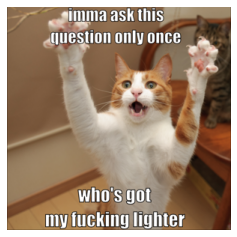

ground truth label:  0
predicted label:  0


In [ ]:
show_result(29)

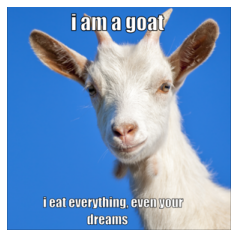

ground truth label:  0
predicted label:  0


In [ ]:
show_result(30)

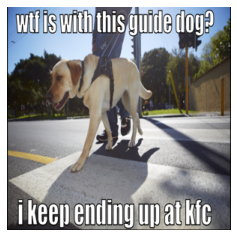

ground truth label:  0
predicted label:  0


In [ ]:
show_result(280)

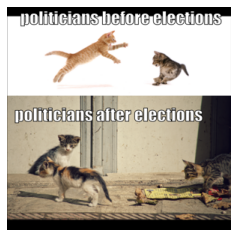

ground truth label:  0
predicted label:  0


In [ ]:
show_result(36)

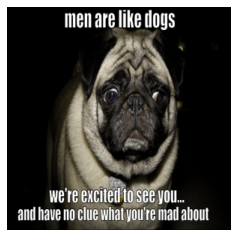

ground truth label:  1
predicted label:  1


In [ ]:
show_result(211)